In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [27]:
df = pd.read_excel('C:/Users/ASUS-X515EP/Downloads/Telegram Desktop/Розрахунки(2021-2022).xlsx')

In [28]:
new_header = df.iloc[0]  
df = df[1:]  
df.rename(columns=new_header, inplace=True)

In [29]:
df.head()

,Name,VAR(95),CVaR(95),Expected return,Range,Inter-quartile,Standard deviation,Skew-ness,Kurtosis,Beta coefficient
1,Bitcoin,-0.1861,-0.220136,-0.003815,0.5841,0.1106,0.096305,-0.230563,1.104846,0.842737
2,Ethereum,-0.2279,-0.283728,0.008218,0.6996,0.1472,0.131412,-0.177398,0.513696,-3.388181
3,Tether,-0.0011,-0.001728,-0.000024,0.0041,0.0006,0.000625,-0.865954,3.271807,0.00158
4,BNB,-0.1876,-0.270155,0.030649,1.3797,0.1261,0.181405,2.155181,9.237168,-8.096005
5,Solana,-0.2424,-0.354136,0.031667,1.2837,0.2412,0.202967,0.53655,1.353115,-1.24095


In [30]:
new_df = df.iloc[:, 1:].copy()
new_df.head()

,VAR(95),CVaR(95),Expected return,Range,Inter-quartile,Standard deviation,Skew-ness,Kurtosis,Beta coefficient
1,-0.1861,-0.220136,-0.003815,0.5841,0.1106,0.096305,-0.230563,1.104846,0.842737
2,-0.2279,-0.283728,0.008218,0.6996,0.1472,0.131412,-0.177398,0.513696,-3.388181
3,-0.0011,-0.001728,-0.000024,0.0041,0.0006,0.000625,-0.865954,3.271807,0.00158
4,-0.1876,-0.270155,0.030649,1.3797,0.1261,0.181405,2.155181,9.237168,-8.096005
5,-0.2424,-0.354136,0.031667,1.2837,0.2412,0.202967,0.53655,1.353115,-1.24095


In [31]:
for i in new_df.columns:
    new_df[i] = new_df[i].astype('float32')

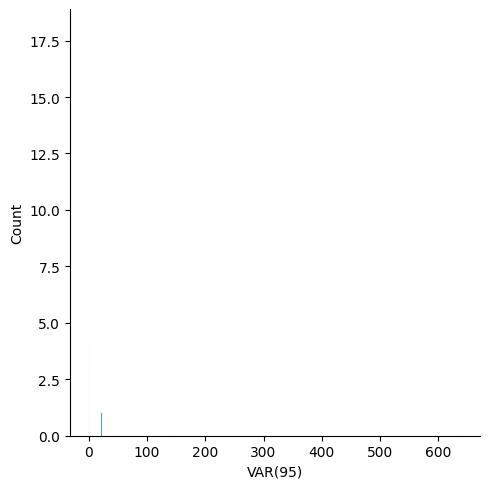

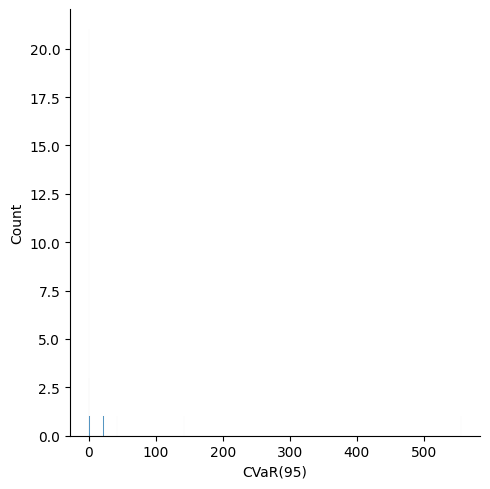

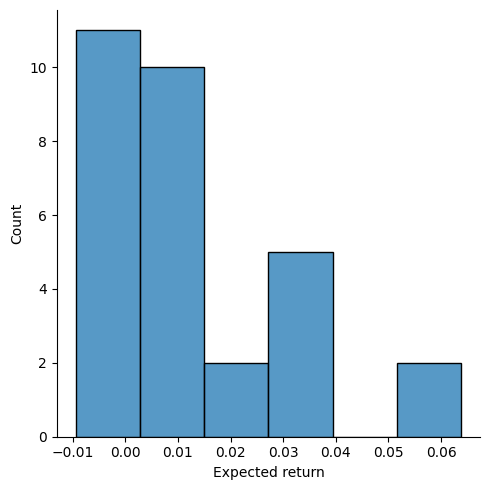

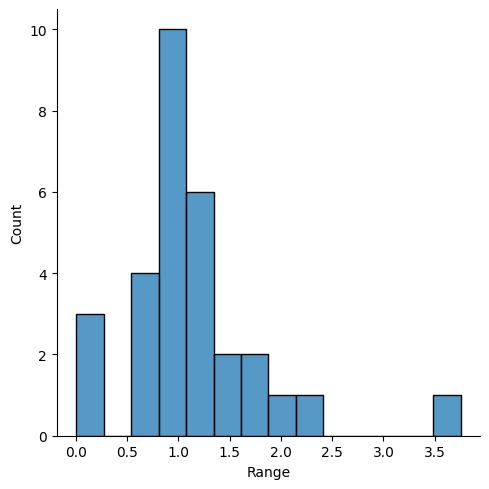

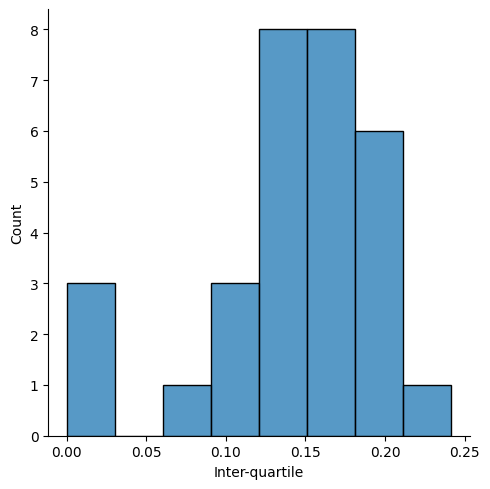

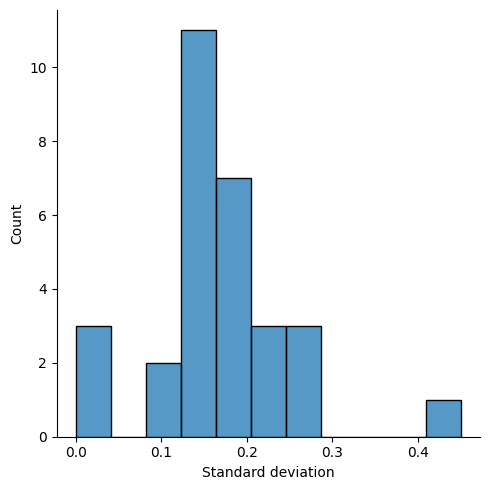

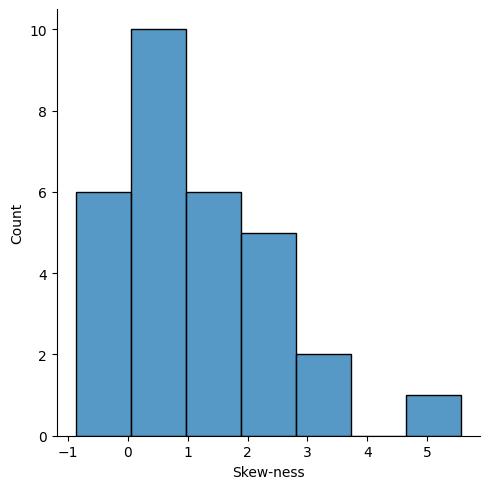

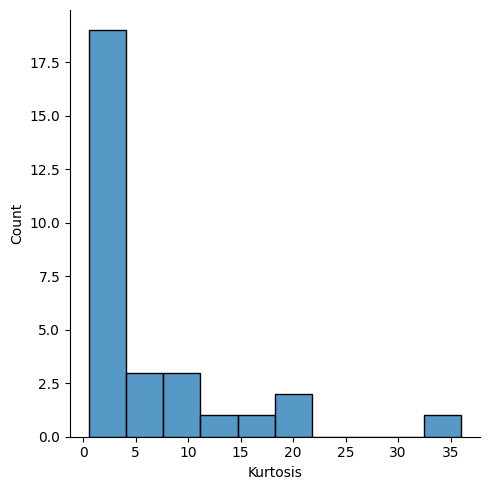

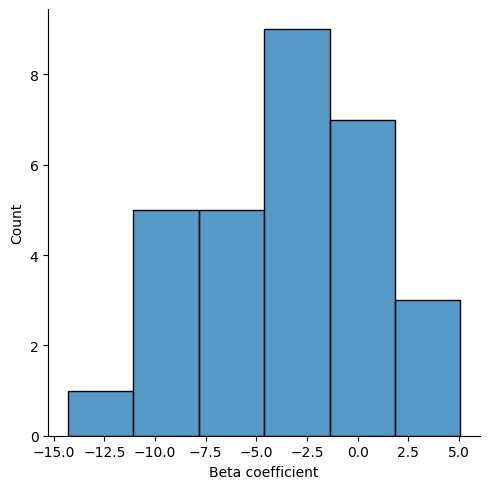

In [33]:
for i in new_df.columns:
    sns.displot(data=new_df,
               x=i)

# Elbow method

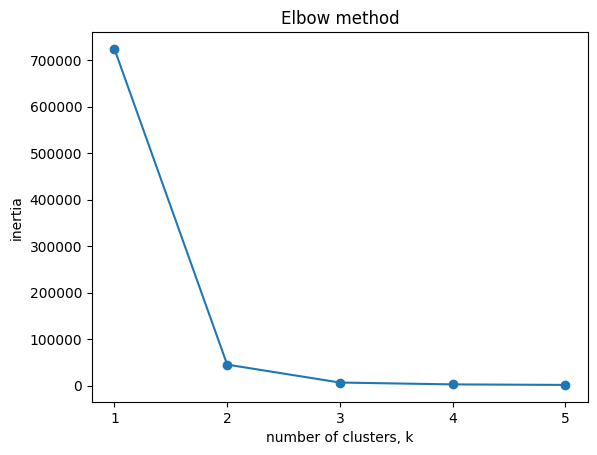

[723842.25, 45070.77734375, 6487.3095703125, 2540.1103515625, 1383.283203125]


In [58]:
ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(new_df)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('Elbow method')
plt.xticks(ks)
plt.show()
print(inertias)

# Clustering

In [38]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3, random_state=11)

pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(new_df)
labels = pipeline.predict(new_df)
labels

array([2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 2])

In [59]:
data_3k = new_df.assign(Cluster=labels)
data_3k = data_3k.assign(Coin_name=df.iloc[:, 0])
data_3k.head()

,VAR(95),CVaR(95),Expected return,Range,Inter-quartile,Standard deviation,Skew-ness,Kurtosis,Beta coefficient,Cluster,Coin_name
1,-0.1861,-0.220136,-0.003815,0.5841,0.1106,0.096305,-0.230563,1.104846,0.842737,2,Bitcoin
2,-0.2279,-0.283728,0.008218,0.6996,0.1472,0.131412,-0.177398,0.513696,-3.388181,2,Ethereum
3,-0.0011,-0.001728,-0.000024,0.0041,0.0006,0.000625,-0.865954,3.271807,0.001580,2,Tether
4,-0.1876,-0.270155,0.030649,1.3797,0.1261,0.181405,2.155181,9.237167,-8.096004,1,BNB
5,-0.2424,-0.354136,0.031667,1.2837,0.2412,0.202967,0.536550,1.353115,-1.240950,2,Solana


In [60]:
f_df = data_3k

columns = list(f_df.columns)
columns.insert(0, columns.pop(columns.index('Coin_name')))
f_df = f_df[columns]
f_df.head()

,Coin_name,VAR(95),CVaR(95),Expected return,Range,Inter-quartile,Standard deviation,Skew-ness,Kurtosis,Beta coefficient,Cluster
1,Bitcoin,-0.1861,-0.220136,-0.003815,0.5841,0.1106,0.096305,-0.230563,1.104846,0.842737,2
2,Ethereum,-0.2279,-0.283728,0.008218,0.6996,0.1472,0.131412,-0.177398,0.513696,-3.388181,2
3,Tether,-0.0011,-0.001728,-0.000024,0.0041,0.0006,0.000625,-0.865954,3.271807,0.001580,2
4,BNB,-0.1876,-0.270155,0.030649,1.3797,0.1261,0.181405,2.155181,9.237167,-8.096004,1
5,Solana,-0.2424,-0.354136,0.031667,1.2837,0.2412,0.202967,0.536550,1.353115,-1.240950,2


In [56]:
file_path = 'C:/Users/ASUS-X515EP/Downloads/l_cl.xlsx'

f_df.to_excel(file_path, index=False)